In [ ]:

!pip install opencv-python tensorflow keras numpy matplotlib
!pip install numpy==1.26.4
!pip install tensorflow==2.15.0


from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
import zipfile
from sklearn.metrics import confusion_matrix

# wandb
import wandb
from wandb.keras import WandbCallback


wandb.login()
run = wandb.init(project="emotion-detection-project")


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam,SGD
from tensorflow.keras.utils import to_categorical

# Unzip dataset and images
zip_ref = zipfile.ZipFile("/content/drive/My Drive/fer.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/My Drive/image.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()


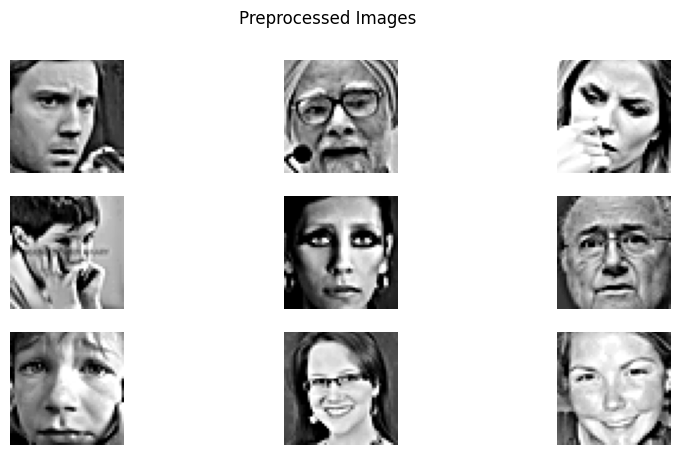

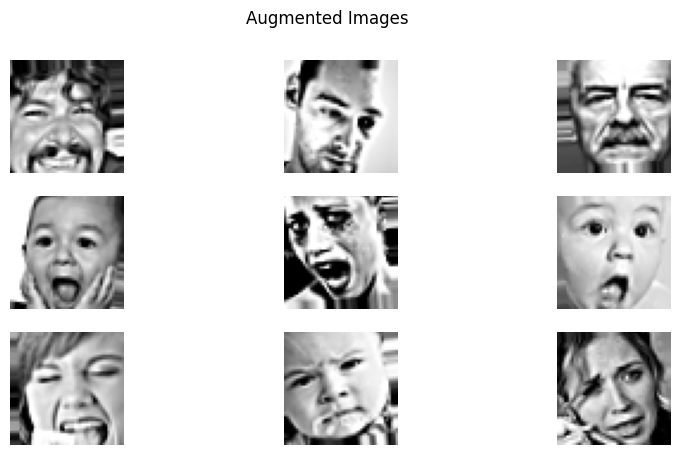

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                             

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: saving model to overall_model.h5
897/897 [==============================] - 83s 85ms/step - loss: 2.2393 - accuracy: 0.2288 - val_loss: 3.9645 - val_accuracy: 0.2628 - lr: 0.0010
Epoch 2/50
897/897 [==============================] - ETA: 0s - loss: 1.6854 - accuracy: 0.3304
Epoch 2: val_accuracy improved from 0.26283 to 0.36747, saving model to /content/drive/My Drive/best_model.h5

Epoch 2: saving model to overall_model.h5
897/897 [==============================] - 56s 62ms/step - loss: 1.6854 - accuracy: 0.3304 - val_loss: 1.7128 - val_accuracy: 0.3675 - lr: 0.0010
Epoch 3/50
897/897 [==============================] - ETA: 0s - loss: 1.4578 - accuracy: 0.4340
Epoch 3: val_accuracy improved from 0.36747 to 0.46680, saving model to /content/drive/My Drive/best_model.h5

Epoch 3: saving model to overall_model.h5
897/897 [==============================] - 60s 67ms/step - loss: 1.4578 - accuracy: 0.4340 - val_loss: 1.4105 - val_accuracy: 0.4668 - lr: 0.0010
Epoch 4/50
897/897 [=

NameError: name 'classes' is not defined

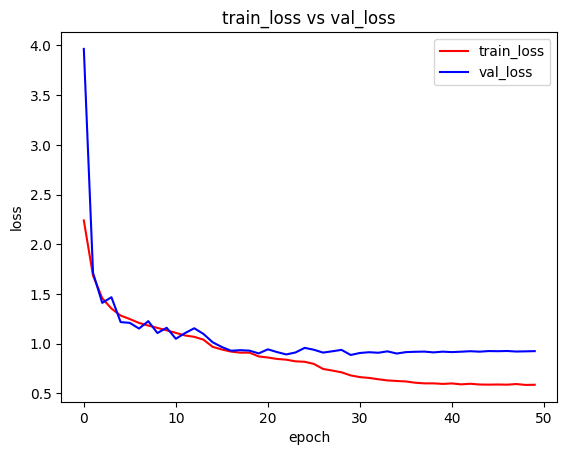

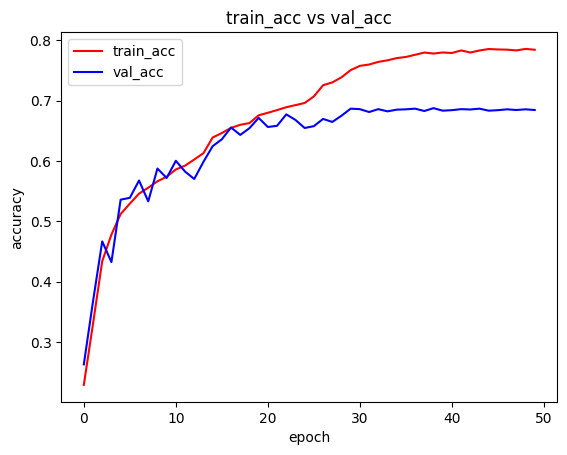

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageFilter

# Define your preprocessing function with PIL's Unsharp Mask filter
def preprocess_image(img, radius=2, percent=150, threshold=3):
    # Convert numpy array to PIL Image
    pil_img = Image.fromarray(img)

    # Apply unsharp mask filter
    sharpened_img = pil_img.filter(ImageFilter.UnsharpMask(radius=radius, percent=percent, threshold=threshold))

    # Convert PIL Image back to numpy array
    sharpened_img = np.array(sharpened_img)

    # Normalize the image to the range [0, 255]
    sharpened_img = cv2.normalize(sharpened_img, None, 0, 255, cv2.NORM_MINMAX)

    return sharpened_img
# Modify the load_fer2013 function to return the 'Usage' column
def load_fer2013(csv_file):
    data = pd.read_csv(csv_file)
    pixels = data['pixels'].tolist()
    emotions = data['emotion'].values
    usage = data['Usage'].values  # Load the Usage column
    images = []

    for pixel_sequence in pixels:
        img = np.fromstring(pixel_sequence, sep=' ').reshape(48, 48).astype(np.uint8)
        img = preprocess_image(img)  # Apply preprocessing
        images.append(img)

    images = np.array(images)
    return images, emotions, usage

# Load and preprocess the FER2013 dataset
csv_file = '/content/dataset/fer2013.csv'  # Update the path as needed
X, y, usage = load_fer2013(csv_file)

# Split the data based on the 'Usage' column
X_train = X[usage == 'Training']
y_train = y[usage == 'Training']
X_val = X[usage == 'PrivateTest']
y_val = y[usage == 'PrivateTest']
X_test = X[usage == 'PublicTest']
y_test = y[usage == 'PublicTest']

# Reshape the images to (48, 48, 1)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# One-hot encode the labels
num_classes = len(np.unique(y))  # Number of unique emotions
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Data augmentation for training data
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

# Normalization for validation and test data
valgen = ImageDataGenerator(rescale=1./255)
testgen = ImageDataGenerator(rescale=1./255)

# Fit data augmentation parameters
datagen.fit(X_train)

# Create data generators
batch_size = 32
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size)
val_flow = valgen.flow(X_val, y_val, batch_size=batch_size)
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)



# Display some preprocessed images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i].reshape(48, 48), cmap='gray')
plt.suptitle('Preprocessed Images')
plt.show()

# Display some augmented images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(10, 5))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(48, 48), cmap='gray')
    plt.suptitle('Augmented Images')
    plt.show()
    break



import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
#from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint



def FER_Model(input_shape=(48,48,1)):
    visible = Input(shape=input_shape, name='input')
    num_classes = 7

    # 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, padding='same', name='conv1_1')(visible)
    conv1_1 = LeakyReLU(alpha=0.01)(conv1_1)  # Apply Leaky ReLU with alpha=0.01
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, padding='same', name='conv1_2')(conv1_1)
    conv1_2 = LeakyReLU(alpha=0.01)(conv1_2)  # Apply Leaky ReLU with alpha=0.01
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2, 2), name='pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name='drop1_1')(pool1_1)  # Increased dropout rate

    # 2nd block
    conv2_1 = Conv2D(128, kernel_size=3, padding='same', name='conv2_1')(drop1_1)
    conv2_1 = LeakyReLU(alpha=0.01)(conv2_1)  # Apply Leaky ReLU with alpha=0.01
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, padding='same', name='conv2_2')(conv2_1)
    conv2_2 = LeakyReLU(alpha=0.01)(conv2_2)  # Apply Leaky ReLU with alpha=0.01
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, padding='same', name='conv2_3')(conv2_2)
    conv2_3 = LeakyReLU(alpha=0.01)(conv2_3)  # Apply Leaky ReLU with alpha=0.01
    conv2_3 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2, 2), name='pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name='drop2_1')(pool2_1)  # Increased dropout rate

    # 3rd block
    conv3_1 = Conv2D(256, kernel_size=3, padding='same', name='conv3_1')(drop2_1)
    conv3_1 = LeakyReLU(alpha=0.01)(conv3_1)  # Apply Leaky ReLU with alpha=0.01
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, padding='same', name='conv3_2')(conv3_1)
    conv3_2 = LeakyReLU(alpha=0.01)(conv3_2)  # Apply Leaky ReLU with alpha=0.01
    conv3_2 = BatchNormalization()(conv3_2)
    conv3_3 = Conv2D(256, kernel_size=3, padding='same', name='conv3_3')(conv3_2)
    conv3_3 = LeakyReLU(alpha=0.01)(conv3_3)  # Apply Leaky ReLU with alpha=0.01
    conv3_3 = BatchNormalization()(conv3_3)
    conv3_4 = Conv2D(256, kernel_size=3, padding='same', name='conv3_4')(conv3_3)
    conv3_4 = LeakyReLU(alpha=0.01)(conv3_4)  # Apply Leaky ReLU with alpha=0.01
    conv3_4 = BatchNormalization()(conv3_4)
    pool3_1 = MaxPooling2D(pool_size=(2, 2), name='pool3_1')(conv3_4)
    drop3_1 = Dropout(0.4, name='drop3_1')(pool3_1)  # Increased dropout rate

    # 4th block
    conv4_1 = Conv2D(256, kernel_size=3, padding='same', name='conv4_1')(drop3_1)
    conv4_1 = LeakyReLU(alpha=0.01)(conv4_1)  # Apply Leaky ReLU with alpha=0.01
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, padding='same', name='conv4_2')(conv4_1)
    conv4_2 = LeakyReLU(alpha=0.01)(conv4_2)  # Apply Leaky ReLU with alpha=0.01
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, padding='same', name='conv4_3')(conv4_2)
    conv4_3 = LeakyReLU(alpha=0.01)(conv4_3)  # Apply Leaky ReLU with alpha=0.01
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, padding='same', name='conv4_4')(conv4_3)
    conv4_4 = LeakyReLU(alpha=0.01)(conv4_4)  # Apply Leaky ReLU with alpha=0.01
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2, 2), name='pool4_1')(conv4_4)
    drop4_1 = Dropout(0.4, name='drop4_1')(pool4_1)  # Increased dropout rate

    # 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, padding='same', name='conv5_1')(drop4_1)
    conv5_1 = LeakyReLU(alpha=0.01)(conv5_1)  # Apply Leaky ReLU with alpha=0.01
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, padding='same', name='conv5_2')(conv5_1)
    conv5_2 = LeakyReLU(alpha=0.01)(conv5_2)  # Apply Leaky ReLU with alpha=0.01
    conv5_2 = BatchNormalization()(conv5_2)
    conv5_3 = Conv2D(512, kernel_size=3, padding='same', name='conv5_3')(conv5_2)
    conv5_3 = LeakyReLU(alpha=0.01)(conv5_3)  # Apply Leaky ReLU with alpha=0.01
    conv5_3 = BatchNormalization()(conv5_3)
    conv5_4 = Conv2D(512, kernel_size=3, padding='same', name='conv5_4')(conv5_3)
    conv5_4 = LeakyReLU(alpha=0.01)(conv5_4)  # Apply Leaky ReLU with alpha=0.01
    conv5_4 = BatchNormalization()(conv5_4)
    pool5_1 = MaxPooling2D(pool_size=(2, 2), name='pool5_1')(conv5_4)
    drop5_1 = Dropout(0.5, name='drop5_1')(pool5_1)  # Increased dropout rate

    # Flatten and output
    flatten = Flatten(name='flatten')(drop5_1)
    output = Dense(num_classes, activation='softmax', name='output')(flatten)

    model = Model(inputs=visible, outputs=output)

    #summary layers
    print(model.summary())

    return model
model = FER_Model()
#opt = Adam(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Custom EpochSaver class to save the current epoch number
class EpochSaver(tensorflow.keras.callbacks.Callback):
    def __init__(self, filepath):
        super(EpochSaver, self).__init__()
        self.filepath = filepath

    def on_epoch_end(self, epoch, logs=None):
        with open(self.filepath, 'w') as f:
            f.write(str(epoch + 1))  # Save next epoch number

# Load last saved epoch number
initial_epoch = 0
try:
    with open('current_epoch.txt', 'r') as f:
        initial_epoch = int(f.read())
except FileNotFoundError:
    pass

# Define ModelCheckpoint to save model after each epoch
checkpoint_callback = ModelCheckpoint(
    filepath='overall_model.h5',
    save_weights_only=False,  # Save entire model
    save_freq='epoch',
    verbose=1
)
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)


# Define the ReduceLROnPlateau callback

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)
# Add custom epoch saver callback
epoch_saver = EpochSaver(filepath='current_epoch.txt')

# Train the model with updated callbacks
history = model.fit(
    train_flow,
    steps_per_epoch=len(X_train) // batch_size,  # Use integer division
    epochs=50,  # Number of epochs for training
    verbose=1,
    validation_data=val_flow,  # Use validation data for evaluation
    validation_steps=len(X_val) // batch_size,  # Use integer division
    callbacks=[WandbCallback(save_model=True),reduce_lr, checkpoint, checkpoint_callback, epoch_saver],   # Added callbacks
    # callbacks=[WandbCallback(save_model=True)]
    initial_epoch=initial_epoch  # Resume training from last saved epoch
)


# Save the model in both HDF5 and Keras formats
model.save('overall_model.h5')
model.save('overall_model.keras')
# Save the model in both HDF5 and Keras formats
model.save('/content/drive/My Drive/overall_model.h5')
model.save('/content/drive/My Drive/overall_model.keras')


##graph
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()



model.save('./working/Fer2013.h5') #backing up working model and weights



loss = model.evaluate(X_test/255., y_test)
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

##confusion matrix

import itertools
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

    np.set_printoptions(precision=2)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

y_pred = model.predict(test_flow)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)



y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,   title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')



model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

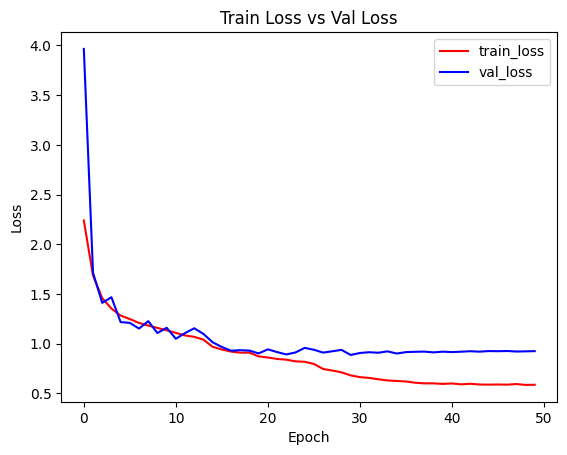

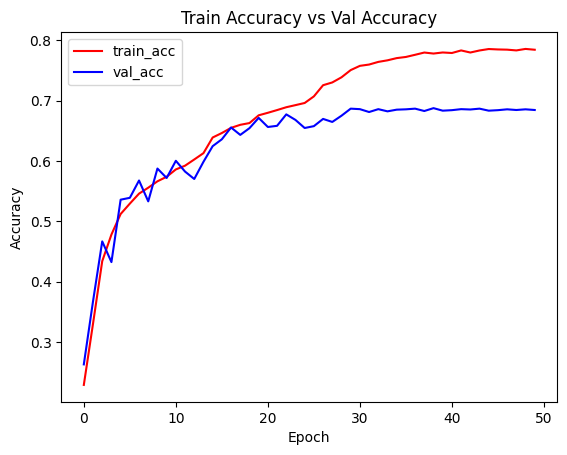

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/overall_model.h5')

# Assuming 'history' is available from previous training
# For example, history = model.fit(...)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(train_acc))

# Plot loss
plt.plot(epochs, train_loss, 'r', label='train_loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Train Loss vs Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()

# Plot accuracy
plt.plot(epochs, train_acc, 'r', label='train_acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Train Accuracy vs Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Show the plots
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


113/113 [==============================] - 3s 19ms/step - loss: 0.9776 - accuracy: 0.6762
Test Loss: 0.977631151676178
Test Accuracy: 0.6762329339981079
113/113 [==============================] - 3s 16ms/step


NameError: name 'os' is not defined

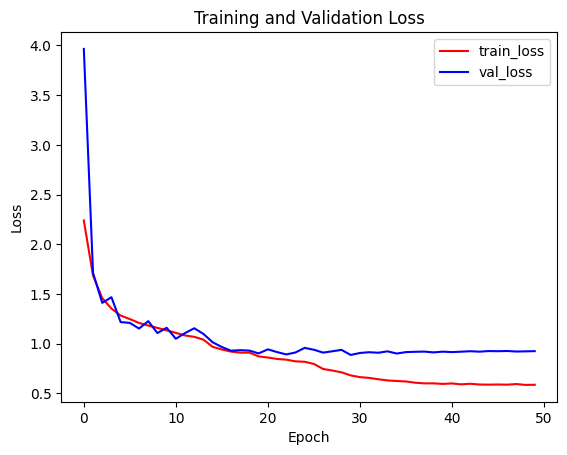

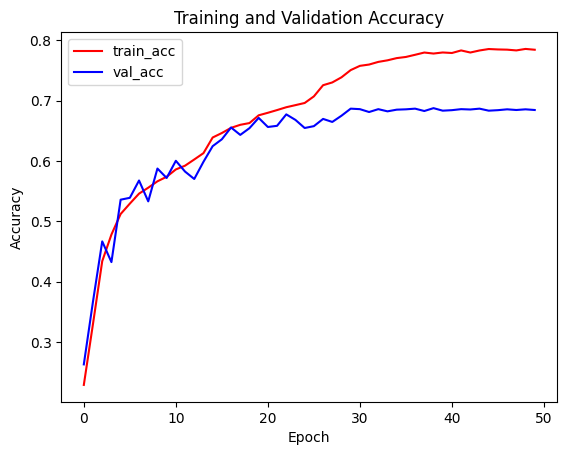

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Plot training and validation loss and accuracy
%matplotlib inline

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs, train_loss, 'r', label='train_loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()

plt.plot(epochs, train_acc, 'r', label='train_acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Save the model and weights
model.save('./working/Fer2013.h5')

# Evaluate the model on test data
loss = model.evaluate(X_test / 255., y_test)
print("Test Loss: " + str(loss[0]))
print("Test Accuracy: " + str(loss[1]))

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

    np.set_printoptions(precision=2)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Predict and plot confusion matrix
y_pred = model.predict(X_test / 255., verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Ensure 'classes' is defined
classes = sorted(os.listdir(train_dir))  # or any list of class labels

plot_confusion_matrix(y_true, y_pred_classes,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Normalized Confusion Matrix')

# Save model architecture and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")


113/113 [==============================] - 2s 17ms/step
Emotion: Anger
  Precision: 0.5510
  Recall:    0.6595
  F1-Score:  0.6004

Emotion: Disgust
  Precision: 0.7879
  Recall:    0.4643
  F1-Score:  0.5843

Emotion: Fear
  Precision: 0.5515
  Recall:    0.4315
  F1-Score:  0.4842

Emotion: Happiness
  Precision: 0.8858
  Recall:    0.8492
  F1-Score:  0.8671

Emotion: Sadness
  Precision: 0.6155
  Recall:    0.5712
  F1-Score:  0.5925

Emotion: Surprise
  Precision: 0.7874
  Recall:    0.8120
  F1-Score:  0.7995

Emotion: Neutral
  Precision: 0.5704
  Recall:    0.6738
  F1-Score:  0.6178



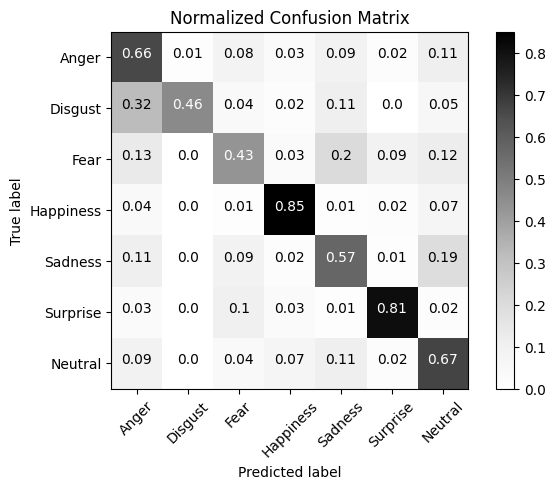

Saved model to disk


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = load_model('./working/Fer2013.h5')  # Use the path where you saved your trained model

# Load test data
# Ensure X_test and y_test are properly defined and preprocessed
# X_test should be normalized like X_test / 255.0 if required

# Predict on test data
y_pred = model.predict(X_test / 255., verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Define the class labels (this should match the labels used in training)
classes = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

# Print classification report
report = classification_report(y_true, y_pred_classes, target_names=classes, output_dict=True)

# Print precision, recall, and F1-score
for label in classes:
    print(f"Emotion: {label}")
    print(f"  Precision: {report[label]['precision']:.4f}")
    print(f"  Recall:    {report[label]['recall']:.4f}")
    print(f"  F1-Score:  {report[label]['f1-score']:.4f}")
    print()

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

    np.set_printoptions(precision=2)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_classes, classes=classes, normalize=True, cmap=plt.cm.Greys, title='Normalized Confusion Matrix')

# Save model architecture and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")


113/113 [==============================] - 2s 14ms/step
Classification Report:
Class        Precision    Recall       F1-Score     Support   
------------------------------------------------------------
Anger        0.5510       0.6595       0.6004       467.0     
Disgust      0.7879       0.4643       0.5843       56.0      
Fear         0.5515       0.4315       0.4842       496.0     
Happiness    0.8858       0.8492       0.8671       895.0     
Sadness      0.6155       0.5712       0.5925       653.0     
Surprise     0.7874       0.8120       0.7995       415.0     
Neutral      0.5704       0.6738       0.6178       607.0     
------------------------------------------------------------
Accuracy: 0.6762
Macro Avg Precision: 0.6785
Macro Avg Recall: 0.6374
Macro Avg F1-Score: 0.6494
Weighted Avg Precision: 0.6806
Weighted Avg Recall: 0.6762
Weighted Avg F1-Score: 0.6751


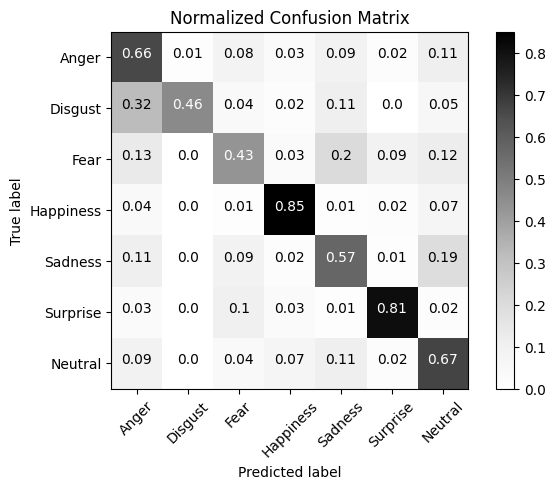

Saved model to disk


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = load_model('./working/Fer2013.h5')  # Use the path where you saved your trained model

# Load test data
# Ensure X_test and y_test are properly defined and preprocessed
# X_test should be normalized like X_test / 255.0 if required

# Predict on test data
y_pred = model.predict(X_test / 255., verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Define the class labels (this should match the labels used in training)
classes = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=classes, output_dict=True)

# Print classification report in table form
print("Classification Report:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("-" * 60)
for label in classes:
    print(f"{label:<12} {report[label]['precision']:<12.4f} {report[label]['recall']:<12.4f} {report[label]['f1-score']:<12.4f} {report[label]['support']:<10}")
print("-" * 60)
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Macro Avg Precision: {report['macro avg']['precision']:.4f}")
print(f"Macro Avg Recall: {report['macro avg']['recall']:.4f}")
print(f"Macro Avg F1-Score: {report['macro avg']['f1-score']:.4f}")
print(f"Weighted Avg Precision: {report['weighted avg']['precision']:.4f}")
print(f"Weighted Avg Recall: {report['weighted avg']['recall']:.4f}")
print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

    np.set_printoptions(precision=2)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_classes, classes=classes, normalize=True, cmap=plt.cm.Greys, title='Normalized Confusion Matrix')

# Save model architecture and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")


1/1 [==============================] - 1s 843ms/step
Image: photo.jpg, Predicted Emotion: Neutral, Probability: 0.5946


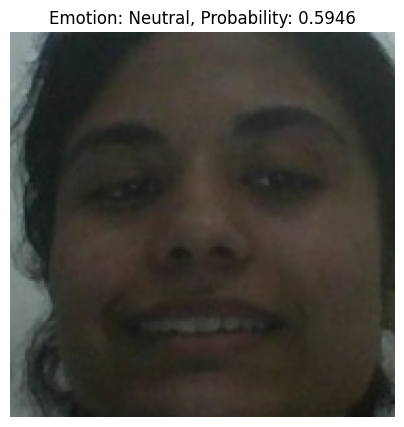

1/1 [==============================] - 0s 18ms/step
Image: s3.jpg, Predicted Emotion: Sad, Probability: 0.8873


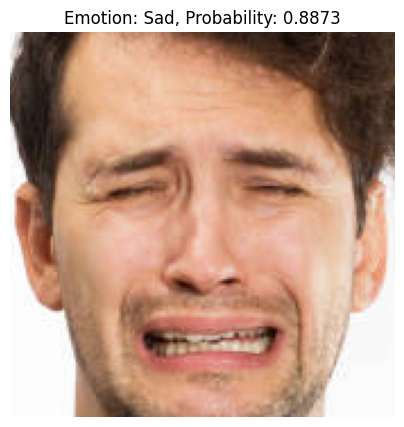

1/1 [==============================] - 0s 18ms/step
Image: photo (3).jpg, Predicted Emotion: Surprise, Probability: 0.7577


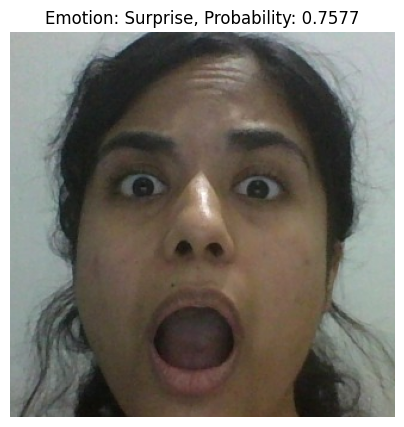

1/1 [==============================] - 0s 18ms/step
Image: photo (7).jpg, Predicted Emotion: Surprise, Probability: 0.9282


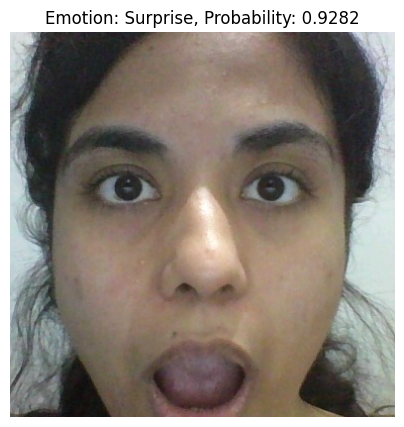

1/1 [==============================] - 0s 20ms/step
Image: a2.jpg, Predicted Emotion: Angry, Probability: 0.7756


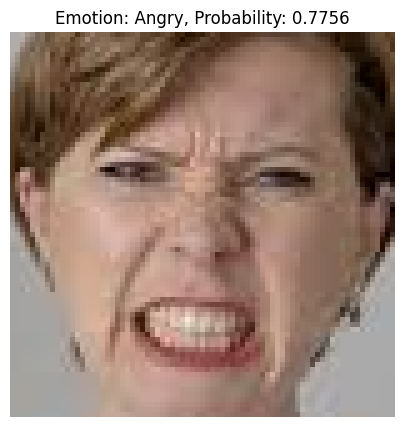

No face detected in hap.jpg
1/1 [==============================] - 0s 19ms/step
Image: photo (2).jpg, Predicted Emotion: Sad, Probability: 0.7646


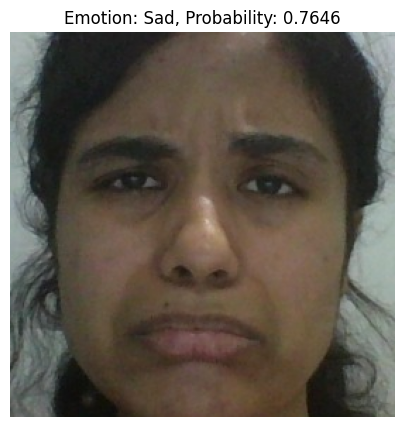

1/1 [==============================] - 0s 27ms/step
Image: photo (2).jpg, Predicted Emotion: Sad, Probability: 0.5556


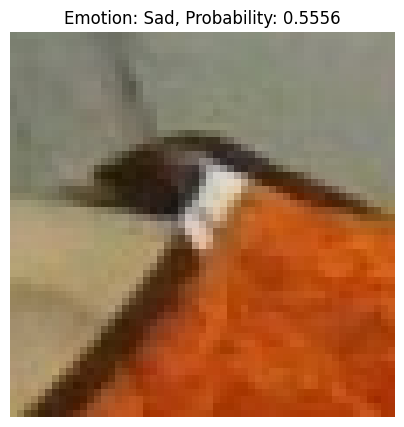

1/1 [==============================] - 0s 21ms/step
Image: hh.png, Predicted Emotion: Happy, Probability: 0.9760


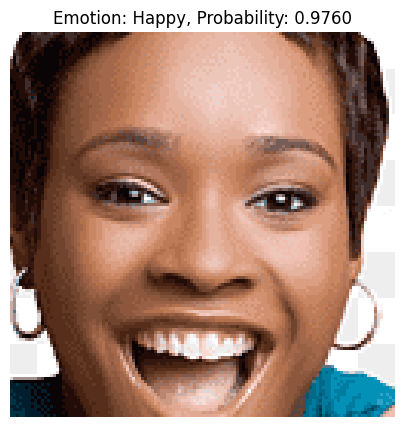

No face detected in images (1).jpeg
1/1 [==============================] - 0s 20ms/step
Image: s2.jpg, Predicted Emotion: Neutral, Probability: 0.9280


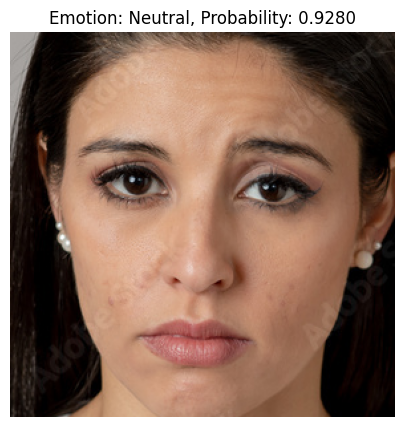

1/1 [==============================] - 0s 18ms/step
Image: photo (4).jpg, Predicted Emotion: Neutral, Probability: 0.5246


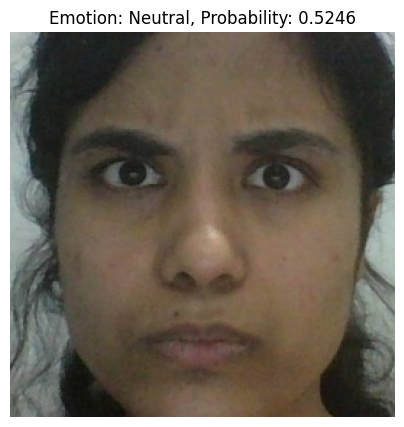

1/1 [==============================] - 0s 32ms/step
Image: photo (4).jpg, Predicted Emotion: Sad, Probability: 0.4334


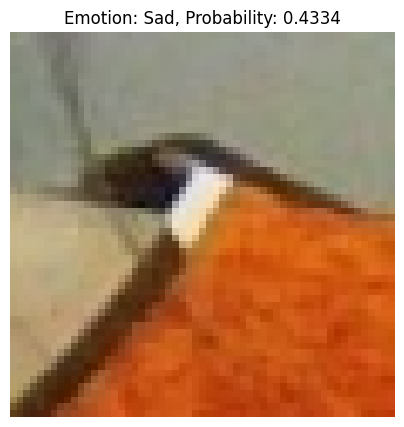

1/1 [==============================] - 0s 19ms/step
Image: istockphoto-184115551-612x612.jpg, Predicted Emotion: Surprise, Probability: 0.9913


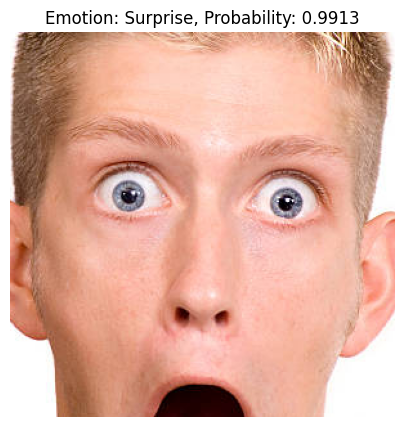

1/1 [==============================] - 0s 20ms/step
Image: 11.jpeg, Predicted Emotion: Happy, Probability: 0.9856


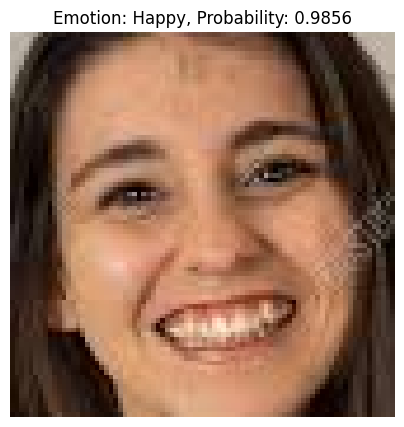

1/1 [==============================] - 0s 19ms/step
Image: photo (5).jpg, Predicted Emotion: Sad, Probability: 0.9118


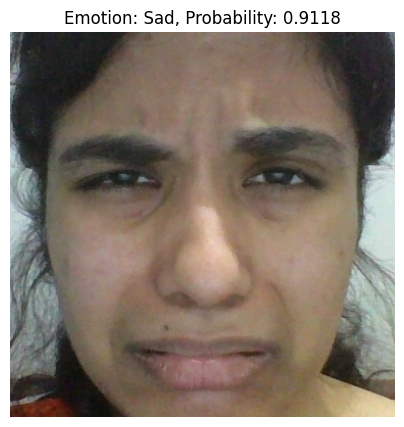

1/1 [==============================] - 0s 18ms/step
Image: istockphoto-151557041-612x612.jpg, Predicted Emotion: Sad, Probability: 0.7341


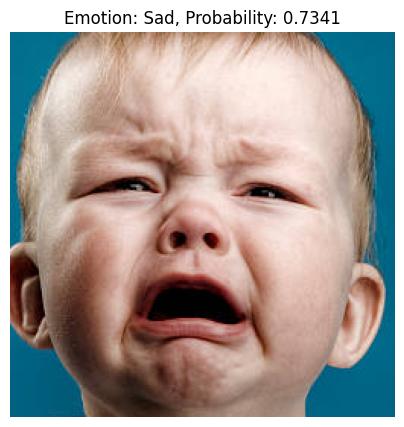

1/1 [==============================] - 0s 18ms/step
Image: h.jpg, Predicted Emotion: Happy, Probability: 0.9662


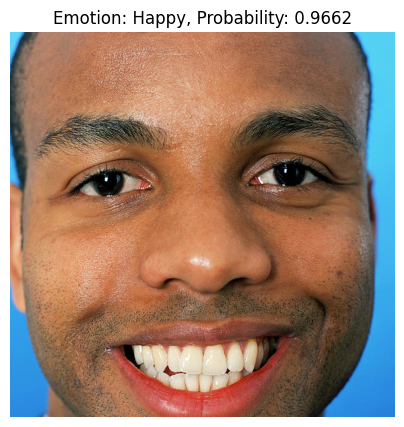

1/1 [==============================] - 0s 21ms/step
Image: photo (1).jpg, Predicted Emotion: Happy, Probability: 0.9860


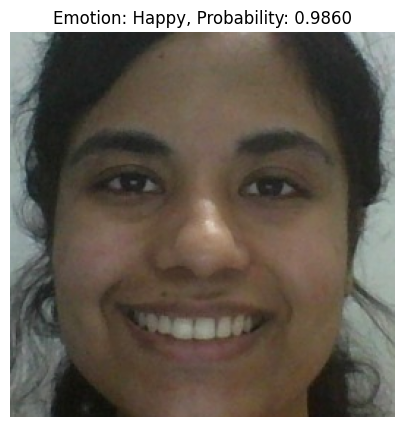

1/1 [==============================] - 0s 24ms/step
Image: photo (6).jpg, Predicted Emotion: Angry, Probability: 0.4796


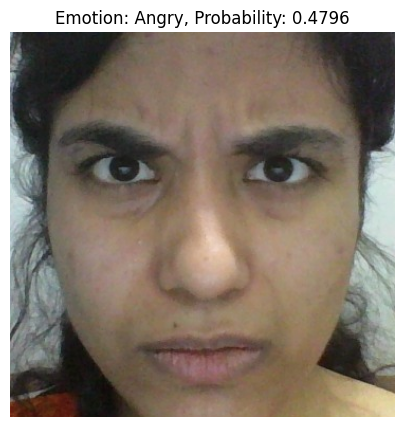

1/1 [==============================] - 0s 19ms/step
Image: s1.webp, Predicted Emotion: Sad, Probability: 0.8342


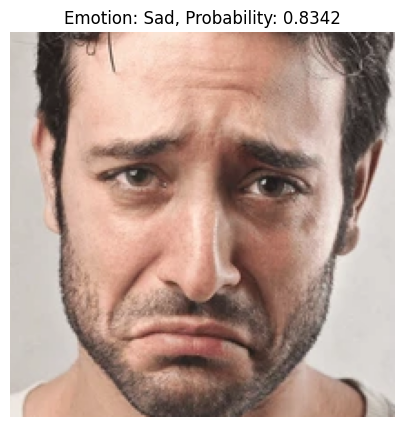

1/1 [==============================] - 0s 25ms/step
Image: images.jpeg, Predicted Emotion: Surprise, Probability: 0.9922


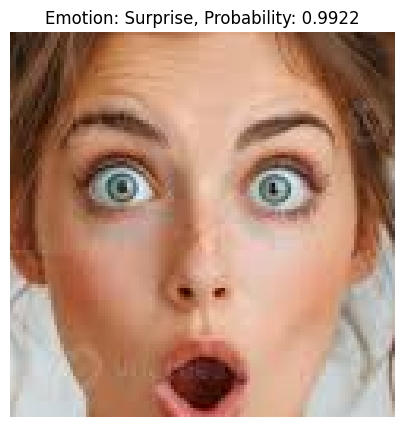

1/1 [==============================] - 0s 30ms/step
Image: images (2).jpeg, Predicted Emotion: Angry, Probability: 0.9944


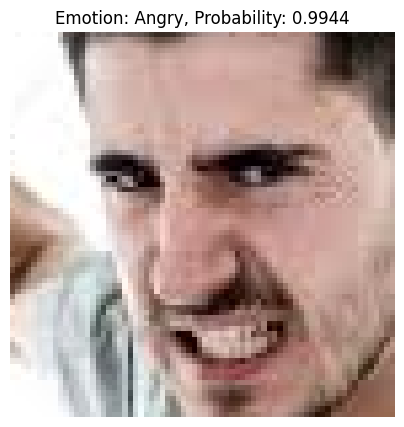

1/1 [==============================] - 0s 19ms/step
Image: 1.jpg, Predicted Emotion: Happy, Probability: 0.9571


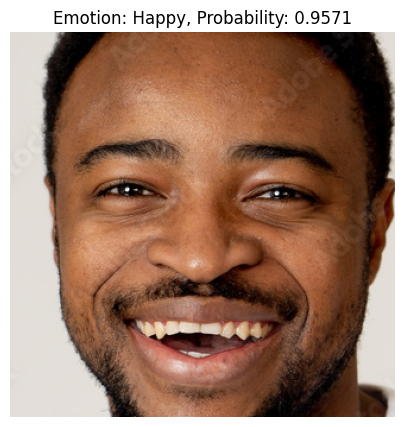

1/1 [==============================] - 0s 35ms/step
Image: a1.jpeg, Predicted Emotion: Angry, Probability: 0.9989


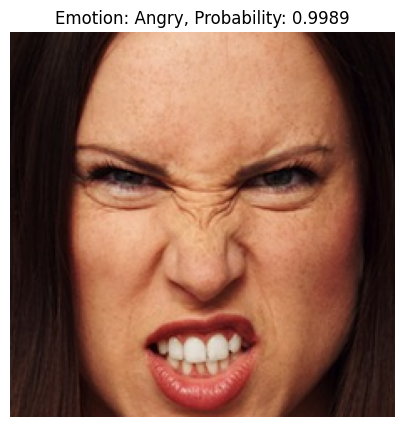

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import cv2  # For Haar Cascade face detection

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/working/Fer2013.h5'
model = tf.keras.models.load_model(model_path)

# Load Haar Cascade for face detection
cascade_path = '/content/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

# Directory containing the images
image_dir = '/content/dataset/image'

# Loop over all image files in the directory
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Convert to grayscale (required for face detection)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print(f"No face detected in {img_file}")
        continue

    for (x, y, w, h) in faces:
        # Extract the face region
        face_img = gray_img[y:y+h, x:x+w]

        # Resize the face to match the input size of the model (48x48)
        face_img_resized = cv2.resize(face_img, (48, 48))

        # Apply unsharp mask filter for sharpening using PIL
        pil_img = Image.fromarray(face_img_resized)
        sharpened_img = pil_img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

        # Convert the sharpened PIL image back to a NumPy array
        sharpened_img = np.array(sharpened_img)

        # Normalize the image to the range [0, 1]
        sharpened_img = sharpened_img.astype('float32') / 255.0

        # Reshape the image to match the model's expected input: (1, 48, 48, 1)
        sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

        # Make a prediction
        predictions = model.predict(sharpened_img)
        predicted_class = np.argmax(predictions, axis=1)[0]
        predicted_prob = predictions[0][predicted_class]

        # Get the corresponding emotion label
        predicted_emotion = emotion_labels[predicted_class]

        # Print the result (class label, emotion name, and probability)
        print(f"Image: {img_file}, Predicted Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")

        # Optional: Display the image and prediction
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_BGR2RGB))
        plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
        plt.axis('off')
        plt.show()


In [ ]:
# @title Real Time Emotion Detection
########################### capture

import numpy as np
import cv2
from IPython.display import display, Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from IPython.display import Javascript
from google.colab.output import eval_js
from PIL import Image as PILImage
from io import BytesIO
import base64

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load pre-trained model
model_path = '/content/best_model.h5'
model = load_model(model_path)

def take_photo(filename='photo.jpg', quality=0.95):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: {width: 1920, height: 1080}}); // Higher resolution

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Convert JavaScript image data URL to OpenCV format image
    img = js_to_image(data)
    # Convert to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Get face bounding box coordinates using Haar Cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    # Draw face bounding box on image
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Save image with high quality
    cv2.imwrite(filename, img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])

    return filename

def js_to_image(data):
    """Convert JavaScript image data URL to OpenCV format image."""
    # Extract base64 data
    header, encoded = data.split(",", 1)
    binary = base64.b64decode(encoded)
    image_data = BytesIO(binary)

    # Convert binary data to PIL Image and then to OpenCV format
    pil_image = PILImage.open(image_data)
    img = np.array(pil_image)
    return img

def preprocess_image(img_path):
    """Preprocess the image for model prediction."""
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size if necessary
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Capture and process photo
try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))

    # Preprocess the image
    img_array = preprocess_image(filename)

    # Make prediction
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Display predictions
    print("Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score:.2f})")

    # Show the image which was just taken
    img = PILImage.open(filename)
    display(img)
except Exception as err:
    # Handle errors
    print(str(err))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import cv2  # Import OpenCV for face detection

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the image
img_path = '/content/photo.jpg'

# Load and preprocess the image using OpenCV for face detection
img_cv = cv2.imread(img_path)
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) > 0:
    # If a face is detected, crop the face region
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]  # Crop the face region
        face_resized = cv2.resize(face, (48, 48))  # Resize the face to 48x48 (as required by the model)
        break  # Assuming you only want to process the first detected face
else:
    print("No face detected.")
    exit()

# Convert the face to PIL format to apply the unsharp mask filter
face_pil = Image.fromarray(face_resized)

# Apply unsharp mask filter for sharpening
sharpened_img = face_pil.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the cropped face and prediction
plt.figure(figsize=(5, 5))
plt.imshow(sharpened_img.squeeze(), cmap='gray')  # Display the face
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the single image
img_path = '/content/photo.jpg'

# Load and preprocess the image
img = Image.open(img_path).convert('L')  # Load the image as grayscale ('L' mode) using PIL
img = img.resize((48, 48))  # Resize the image to 48x48

# Apply unsharp mask filter for sharpening
sharpened_img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the single image
img_path = '/content/photo.jpg'

# Load and preprocess the image
img = Image.open(img_path).convert('L')  # Load the image as grayscale ('L' mode) using PIL
img = img.resize((48, 48))  # Resize the image to 48x48

# Apply unsharp mask filter for sharpening
sharpened_img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the single image
img_path = '/content/photo.jpg'

# Load and preprocess the image
img = Image.open(img_path).convert('L')  # Load the image as grayscale ('L' mode) using PIL
img = img.resize((48, 48))  # Resize the image to 48x48

# Apply unsharp mask filter for sharpening
sharpened_img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the single image
img_path = '/content/photo.jpg'

# Load and preprocess the image
img = Image.open(img_path).convert('L')  # Load the image as grayscale ('L' mode) using PIL
img = img.resize((48, 48))  # Resize the image to 48x48

# Apply unsharp mask filter for sharpening
sharpened_img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the single image
img_path = '/content/photo.jpg'

# Load and preprocess the image
img = Image.open(img_path).convert('L')  # Load the image as grayscale ('L' mode) using PIL
img = img.resize((48, 48))  # Resize the image to 48x48

# Apply unsharp mask filter for sharpening
sharpened_img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the single image
img_path = '/content/photo.jpg'

# Load and preprocess the image
img = Image.open(img_path).convert('L')  # Load the image as grayscale ('L' mode) using PIL
img = img.resize((48, 48))  # Resize the image to 48x48

# Apply unsharp mask filter for sharpening
sharpened_img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the model from /content
model_path = '/content/best_model.h5'
model = tf.keras.models.load_model(model_path)

# Path to the single image
img_path = '/content/photo.jpg'

# Load and preprocess the image
img = Image.open(img_path).convert('L')  # Load the image as grayscale ('L' mode) using PIL
img = img.resize((48, 48))  # Resize the image to 48x48

# Apply unsharp mask filter for sharpening
sharpened_img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

# Convert the sharpened PIL image back to a NumPy array
sharpened_img = np.array(sharpened_img)

# Normalize the image to the range [0, 1]
sharpened_img = sharpened_img.astype('float32') / 255.0

# Reshape the image to match the model's expected input: (1, 48, 48, 1)
sharpened_img = np.expand_dims(sharpened_img, axis=(0, -1))

# Make a prediction
predictions = model.predict(sharpened_img)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_prob = predictions[0][predicted_class]

# Get the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

# Print the result (class label, emotion name, and probability)
print(f"Image: {img_path}, Predicted Class: {predicted_class} ({predicted_emotion}), Probability: {predicted_prob:.4f}")

# Optional: Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title(f"Emotion: {predicted_emotion}, Probability: {predicted_prob:.4f}")
plt.axis('off')
plt.show()
